In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

data_dir='data/'
%pylab inline
#pylab.rcParams['figure.figsize'] = (10, 4)
pylab.rcParams['figure.figsize'] = (14, 12)

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Read app cpu data
file_name='agg_application_pod_hourly.csv'
df=pd.read_csv(data_dir+file_name, header=None, na_values=[r'\N'])
df.columns = ['hour_key', 'date_key','datacenter','superpod','pod','mem_utilization','max_app_cpu','avg_app_cpu','gc_perc','p95_app_cpu','last_modified','app_host_count_active','app_transacting_host_count']
cpu_df = df.copy()
cpu_df.head()
#The columns you want here are hour_key, date_key, datacenter, superpod, pod and avg_app_cpu

,hour_key,date_key,datacenter,superpod,pod,mem_utilization,max_app_cpu,avg_app_cpu,gc_perc,p95_app_cpu,last_modified,app_host_count_active,app_transacting_host_count
0,7,20170121,LON,SP9,cs86,37.980300,7.938677,5.929535,0.799236,NaN,2017-02-27 20:38:10.59641,NaN,NaN
1,7,20170121,WAS,SP2,na4,69.257324,14.353811,11.269566,0.910468,NaN,2017-02-27 20:38:10.59641,NaN,NaN
2,7,20170121,CHI,SP1,gs0,33.341110,17.466251,10.286361,1.259740,NaN,2017-02-27 20:38:10.59641,NaN,NaN
3,7,20170121,CHI,SP3,cs23,62.849570,13.417571,9.052662,0.980685,NaN,2017-02-27 20:38:10.59641,NaN,NaN
4,7,20170121,LON,SP9,cs87,34.985798,7.711010,5.902223,0.510657,NaN,2017-02-27 20:38:10.59641,NaN,NaN


In [3]:
#Read db size data
file_name='agg_database_daily.csv'
df=pd.read_csv(data_dir+file_name, header=None, na_values=[r'\N'])
df.columns = ['date_key','datacenter','superpod','pod','max_redo_size','max_active_sessions','max_db_cpu_user',
              'max_peak_buffer','avg_db_cpu_system','avg_db_cpu_user','total_db_size_in_tb','used_db_space_in_tb',
              'free_db_space_in_tb','asm_free_db_space_in_tb','asm_used_db_space_in_tb','asm_total_db_size_in_tb',
              'last_modified','asm_used_db_space_perc','oem_cpu_util','oem_read_io_latency']
size_df = df.copy()
size_df.head()
#The columns you want here are date_key, datacenter, superpod, pod and asm_used_db_space_in_tb

,date_key,datacenter,superpod,pod,max_redo_size,max_active_sessions,max_db_cpu_user,max_peak_buffer,avg_db_cpu_system,avg_db_cpu_user,total_db_size_in_tb,used_db_space_in_tb,free_db_space_in_tb,asm_free_db_space_in_tb,asm_used_db_space_in_tb,asm_total_db_size_in_tb,last_modified,asm_used_db_space_perc,oem_cpu_util,oem_read_io_latency
0,20161031,WAS,SP3,na17,12.881275,87.00000,47.800000,1329935.50,2.383255,24.301150,59.996094,46.064330,13.931762,8.102020,51.894073,59.996094,2017-02-27 20:43:53.642455,NaN,NaN,NaN
1,20161025,CHI,SP2,cs15,65.872505,69.13125,30.184166,1189676.40,1.605119,14.272053,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-27 20:43:53.642455,NaN,NaN,NaN
2,20161031,CHI,SP4,cs40,30.010305,86.00000,22.050000,863386.70,1.165605,9.444780,106.871520,87.290870,19.580648,15.005844,91.865680,106.871520,2017-02-27 20:43:53.642455,NaN,NaN,NaN
3,20161031,WAS,SP3,na23,6.484551,72.00000,35.066666,1139595.20,1.797749,13.583612,59.996094,32.447983,27.548110,20.739609,39.256485,59.996094,2017-02-27 20:43:53.642455,NaN,NaN,NaN
4,20161031,PHX,SP1,na45,4.759383,50.00000,17.758333,744373.94,1.134943,9.120685,67.498900,26.249228,41.249672,30.199581,37.299320,67.498900,2017-02-27 20:43:53.642455,NaN,NaN,NaN


In [4]:
#Read apt and transactions
file_name='agg_business_pod_hourly.csv'
df=pd.read_csv(data_dir+file_name, header=None, na_values=[r'\N'])
df.columns = ['hour_key','date_key','datacenter','superpod','pod','avg_apt','total_transactions','users_per_hour','last_modified','release_count']
transaction_df= df.copy()
transaction_df.head()

#The columns you want here are hour_key, date_key, datacenter, superpod, pod, avg_apt and total_transactions

,hour_key,date_key,datacenter,superpod,pod,avg_apt,total_transactions,users_per_hour,last_modified,release_count
0,20,20161218,CHI,SP2,cs16,52.61738,103415.0,4292.0,2017-02-27 20:40:05.88036,NaN
1,20,20161218,PAR,SP1,eu11,74.70248,343981.0,6983.0,2017-02-27 20:40:05.88036,NaN
2,20,20161218,WAS,SP4,na26,173.57855,1287803.0,12146.0,2017-02-27 20:40:05.88036,NaN
3,20,20161218,FRF,SP1,cs85,68.02730,188716.0,1360.0,2017-02-27 20:40:05.88036,NaN
4,20,20161218,WAS,SP4,na31,91.55647,1343143.0,31207.0,2017-02-27 20:40:05.88036,NaN


In [5]:
# Merging of dataFrame along merge_keys
from dateutil import parser

merge_keys = ['hour_key', 'date_key', 'datacenter', 'superpod', 'pod']
transaction_metrics = ['avg_apt', 'total_transactions', 'users_per_hour' ]
db_metrics = ['max_redo_size', 'max_active_sessions', 'max_db_cpu_user', 'max_peak_buffer', 'avg_db_cpu_system', 
              'avg_db_cpu_user','total_db_size_in_tb', 'used_db_space_in_tb', 'free_db_space_in_tb', 
              'asm_free_db_space_in_tb', 'asm_used_db_space_in_tb']
app_cpu_metrics = ['mem_utilization', 'max_app_cpu', 'avg_app_cpu']

metrics = transaction_metrics + db_metrics + app_cpu_metrics

# merge the app cpu and transactions data on hour, date and datacenter, pod and superpod
df1 = cpu_df.merge(transaction_df, on = merge_keys)
#df_all = df1.merge(size_df, on = merge_keys)
#df_all.head()
df_cpu_transactions = df1.copy()
print("Length of dataframe final: {l}".format(l = len(df_cpu_transactions)) )

#check = all([a in df_all.columns.tolist() for a in db_metrics+transaction_metrics])
#print(check)

# add a timestamp column to plot time series
df_time = df_cpu_transactions[['date_key', 'hour_key']].astype(str)
df_time['hour_date'] = df_time['date_key']+ " " + df_time["hour_key"] + ":00" 
time_stamp = [parser.parse(a) for a in df_time['hour_date'].tolist()]
df_cpu_transactions['timestamp'] = time_stamp

print('df_cpu_transactions.head()')
df_cpu_transactions.head()

# DB Size Dataframe does not have the hour key and hence is analyzed separately as a time series. 




Length of dataframe final: 726524
df_cpu_transactions.head()


,hour_key,date_key,datacenter,superpod,pod,mem_utilization,max_app_cpu,avg_app_cpu,gc_perc,p95_app_cpu,last_modified_x,app_host_count_active,app_transacting_host_count,avg_apt,total_transactions,users_per_hour,last_modified_y,release_count,timestamp
0,7,20170121,LON,SP9,cs86,37.980300,7.938677,5.929535,0.799236,NaN,2017-02-27 20:38:10.59641,NaN,NaN,150.61720,201352.0,NaN,2017-02-27 20:40:05.88036,NaN,2017-01-21 07:00:00
1,7,20170121,WAS,SP2,na4,69.257324,14.353811,11.269566,0.910468,NaN,2017-02-27 20:38:10.59641,NaN,NaN,320.99220,1687036.0,NaN,2017-02-27 20:40:05.88036,NaN,2017-01-21 07:00:00
2,7,20170121,CHI,SP1,gs0,33.341110,17.466251,10.286361,1.259740,NaN,2017-02-27 20:38:10.59641,NaN,NaN,85.91909,625453.0,NaN,2017-02-27 20:40:05.88036,NaN,2017-01-21 07:00:00
3,7,20170121,CHI,SP3,cs23,62.849570,13.417571,9.052662,0.980685,NaN,2017-02-27 20:38:10.59641,NaN,NaN,380.58804,77377.0,NaN,2017-02-27 20:40:05.88036,NaN,2017-01-21 07:00:00
4,7,20170121,LON,SP9,cs87,34.985798,7.711010,5.902223,0.510657,NaN,2017-02-27 20:38:10.59641,NaN,NaN,89.07101,318650.0,NaN,2017-02-27 20:40:05.88036,NaN,2017-01-21 07:00:00


In [6]:
def plot_histograms(df, interested_pod="na30", metric_name = 'avg_app_cpu'): 
    mask = (df['pod'] == interested_pod)
    df_model = df.loc[mask]

    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax0, ax1 = axes.flatten()
    n, bins, patches = ax0.hist(df_model[metric_name].dropna(),1000,density=1, facecolor='blue', alpha=0.5)#, 100, density=1, facecolor='blue', alpha=0.5

    mu = np.mean(df_model[metric_name].dropna())
    sigma = np.std(df_model[metric_name].dropna())
    y = stats.norm.pdf(bins, mu, sigma)
    #plt.subplot(1, 2, 1)
    ax0.plot(bins, y, 'r--')
    ax0.set_xlabel(' {metric} [%]'.format(metric = metric_name))
    ax0.set_ylabel('Probability')
    ax0.set_title('Histogram of {metric} [%] \n vs normal distribution for {interested_pod}'.format(metric = metric_name, 
                                                                                                    interested_pod=interested_pod))
    #plt.show()
    n, bins, patches = ax1.hist(df[metric_name].dropna(),1000,density=1, facecolor='blue', alpha=0.5)#, 100, density=1, facecolor='blue', alpha=0.5
    mu = np.mean(df[metric_name].dropna())
    sigma = np.std(df[metric_name].dropna())
    y = stats.norm.pdf(bins, mu, sigma)
    #plt.subplot(1, 2, 2)
    ax1.plot(bins, y, 'r--')
    ax1.set_xlabel(' {metric} [%]'.format(metric = metric_name))
    ax1.set_ylabel('Probability')
    ax1.set_title('Histogram of {metric} [%] \n vs normal distribution'.format(metric = metric_name))
    plt.show()

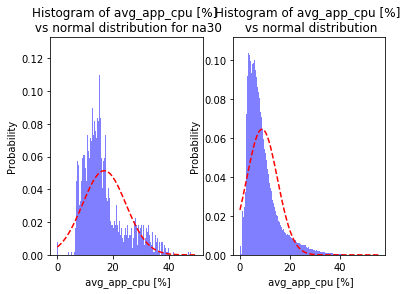

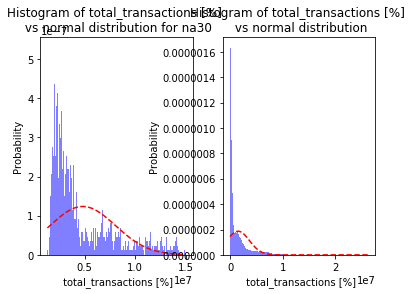

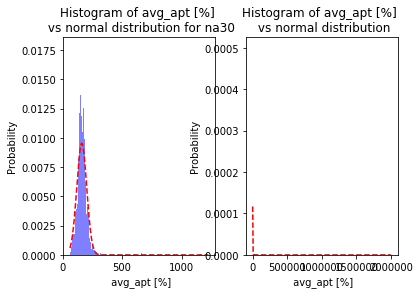

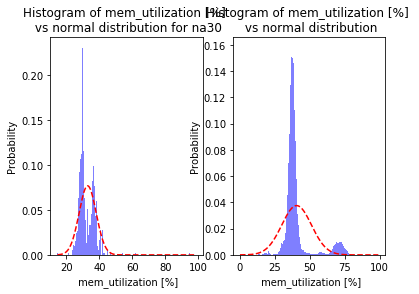

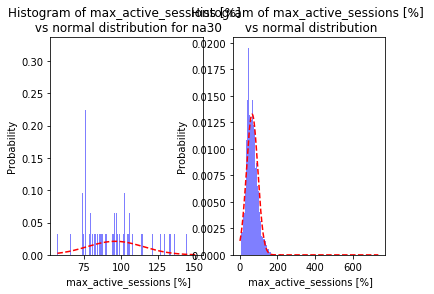

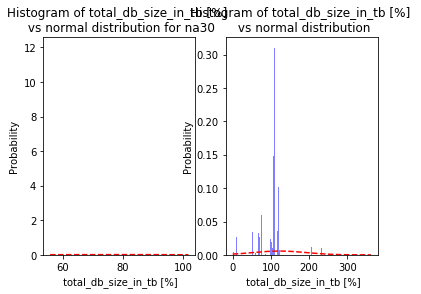

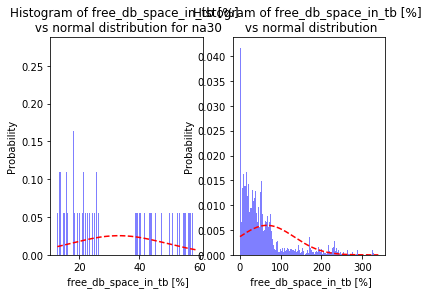

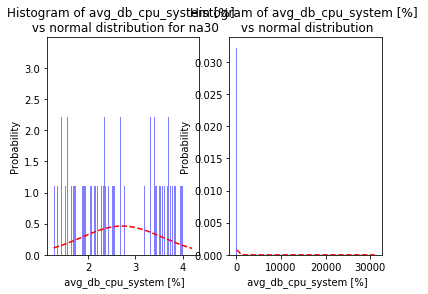

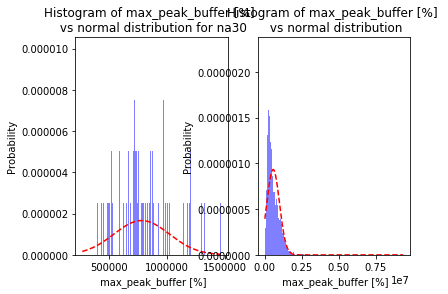

In [7]:
# Plot metrics and their histograms against Normal Distribution
# Example
plot_histograms(cpu_df, interested_pod='na30', metric_name = 'avg_app_cpu')
plot_histograms(df_cpu_transactions, interested_pod = 'na30', metric_name = 'total_transactions')
plot_histograms(df_cpu_transactions, interested_pod = 'na30', metric_name = 'avg_apt')
plot_histograms(df_cpu_transactions, interested_pod = 'na30', metric_name = 'mem_utilization')
plot_histograms(size_df, interested_pod='na30', metric_name = 'max_active_sessions')
plot_histograms(size_df, interested_pod='na30', metric_name = 'total_db_size_in_tb')
plot_histograms(size_df, interested_pod='na30', metric_name = 'free_db_space_in_tb')
plot_histograms(size_df, interested_pod='na30', metric_name = 'avg_db_cpu_system')
plot_histograms(size_df, interested_pod='na30', metric_name = 'max_peak_buffer')


In [8]:
'''Given pod, datacenter, superpod, Scatter between metrics -- overall
The first plot is a plot of metrics given the data center, pod and superpod 
The second plot is a scatter plot of metrics over the entire dataset'''

def plot_scatter(df, datacenter = "LON", pod = 'cs86', superpod = 'SP9', metrics_list = [], figsize = (14, 14)): 
    from pandas.plotting import scatter_matrix
    metrics_list = [a for a in df.columns.tolist() if a in metrics_list]   
    if not len(metrics_list): 
        print('no metrics passed')
        return
    df_plot = df[['datacenter', 'superpod', 'pod'] + metrics_list]
    df_plot_specific = df_plot.loc[(df['datacenter'] == datacenter) & (df['pod'] == pod) & (df['superpod'] == superpod)]
        
    scatter_matrix(df_plot_specific, alpha=0.2, figsize=(14, 14), diagonal='kde')
    plt.suptitle('scatter-matrix for datacenter: {datacenter}, pod: {pod}, superpod: {superpod}'.format(datacenter = datacenter, pod = pod, superpod = superpod))
        
    # this runs a long time and may time out / not generate a plot 
    # scatter_matrix(df_plot, alpha=0.2, figsize=(14,14), diagonal='kde')
    # plt.suptitle('scatter matrix for Metrics List: {metric}'.format(metric = ','.join(metrics_list)))

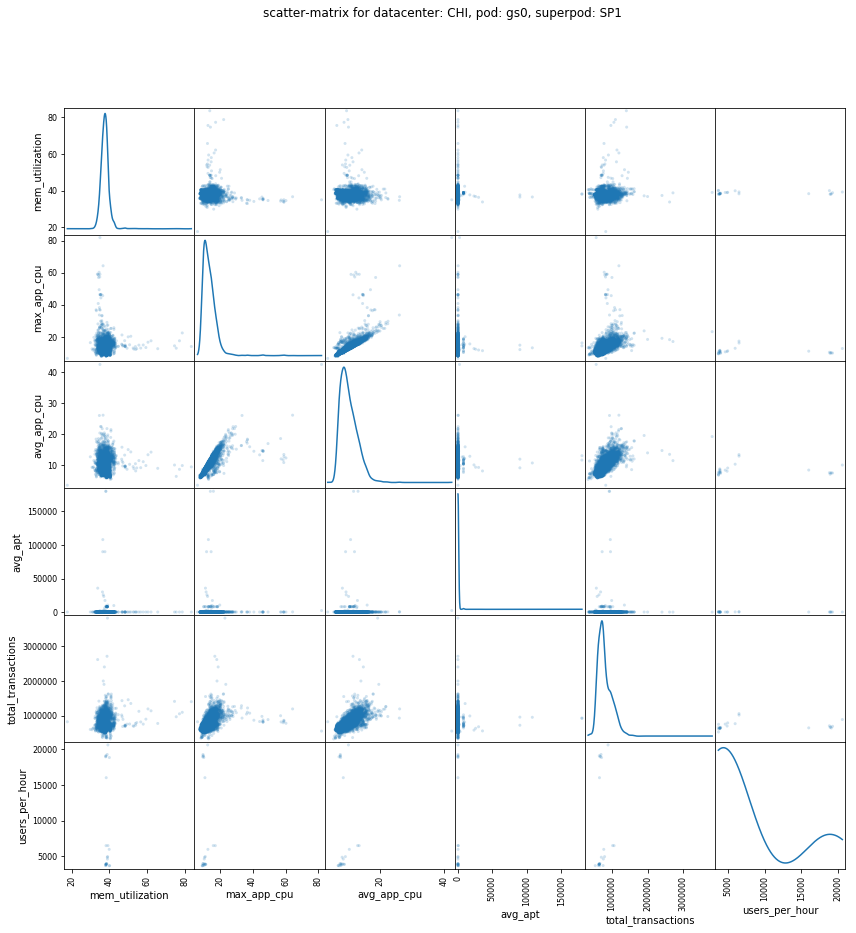

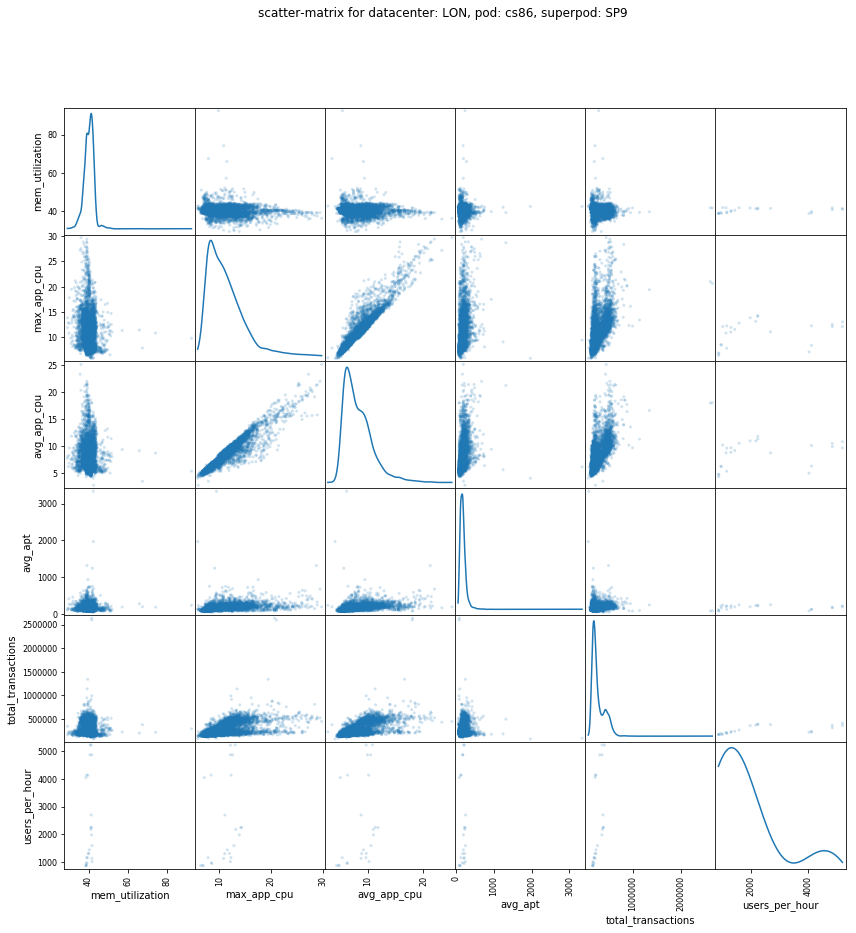

In [9]:
'''
Example to plot a scatter matrix of metrics vs. each other for db_cpu_transactions
'''
plot_scatter(df_cpu_transactions, datacenter = 'CHI', pod ='gs0', superpod = 'SP1', metrics_list = transaction_metrics + app_cpu_metrics)

plot_scatter(df_cpu_transactions, datacenter = "LON", pod = 'cs86', superpod = 'SP9', metrics_list = transaction_metrics + app_cpu_metrics)


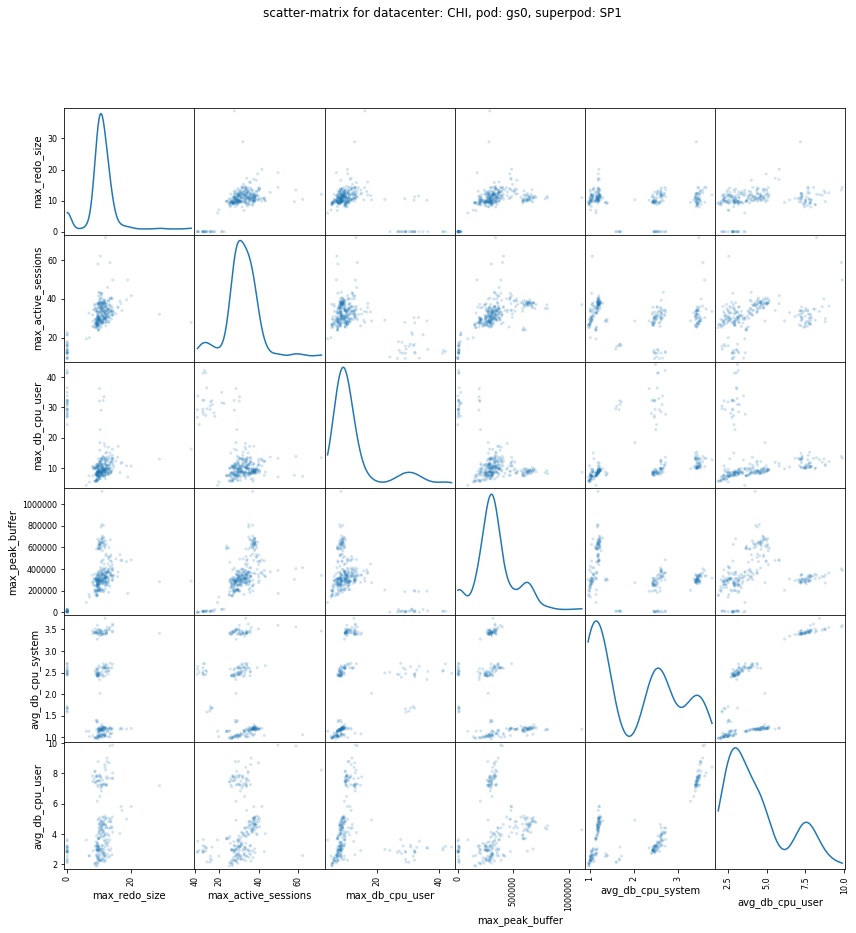

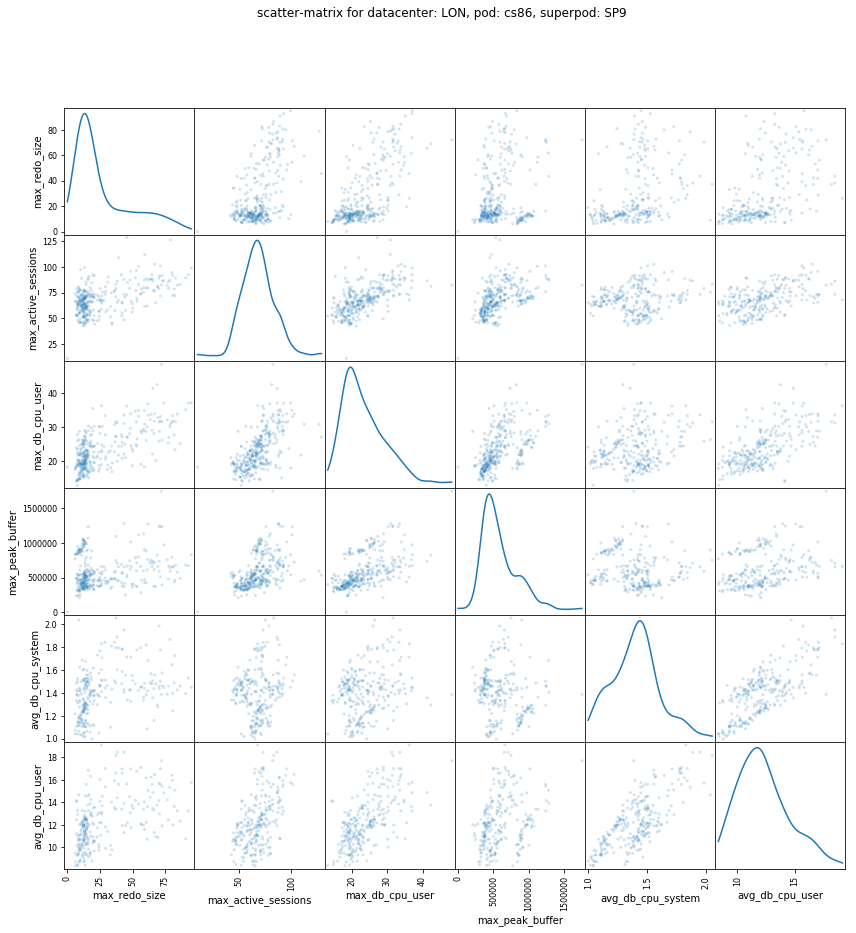

In [10]:
'''
plot of scatter matrix of metrics for db_size 
'''
plot_scatter(size_df, datacenter = 'CHI', pod ='gs0', superpod = 'SP1', metrics_list = db_metrics[0:6], figsize = (20,20))
plot_scatter(size_df, datacenter = "LON", pod = 'cs86', superpod = 'SP9',metrics_list = db_metrics[0:6], figsize = (20, 20))


In [11]:
'''
Combine the df_cpu_transactions with size_df using merge keys: pod, superpod, datacenter, and date
'''

# Aggregate pod, superpod, datacenter, date data over hour 


'\nCombine the df_cpu_transactions with size_df using merge keys: pod, superpod, datacenter, and date\n'

In [12]:
# Time Series plots. 






['hour_key', 'date_key', 'datacenter', 'superpod', 'pod', 'mem_utilization', 'max_app_cpu', 'avg_app_cpu', 'gc_perc', 'p95_app_cpu', 'last_modified_x', 'app_host_count_active', 'app_transacting_host_count', 'avg_apt', 'total_transactions', 'users_per_hour', 'last_modified_y', 'release_count', 'timestamp']


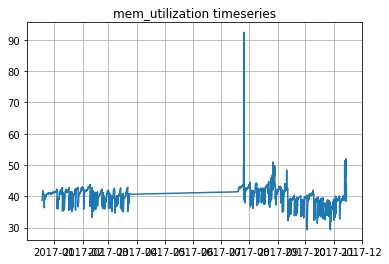

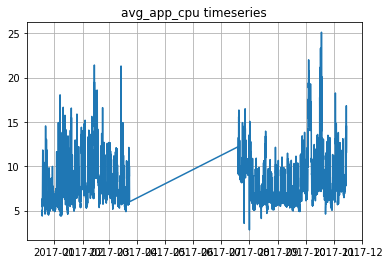

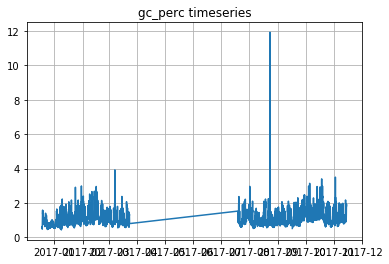

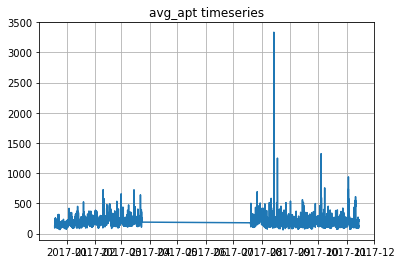

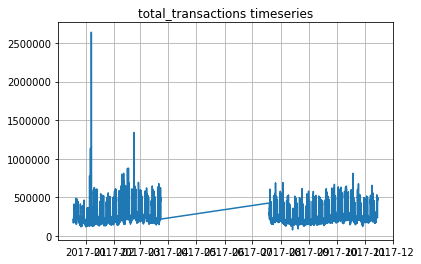

In [13]:
# Given pod, datacenter, superpod, time series plot of metrics

# time series exploration 
datacenter = "LON"
pod = 'cs86'
superpod = 'SP9'

#def plot_histograms(df, interested_pod="na30", metric_name = 'avg_app_cpu'):
mask = (df_cpu_transactions['datacenter'] == datacenter) & (df_cpu_transactions['pod'] == pod) &  (df_cpu_transactions['superpod'] == superpod)
df_series = df_cpu_transactions.loc[mask]
df_series = df_series.sort_values(by='timestamp',ascending=True)


print(df_cpu_transactions.columns.tolist())
metrics = ['mem_utilization', 'avg_app_cpu', 'gc_perc', 'avg_apt', 'total_transactions']

for m in metrics: 
    plt.close()
    plt.figure()
    plt.plot(df_series['timestamp'], df_series[m])
    plt.grid(True)
    plt.title('{m} timeseries'.format(m = m))
    plt.show()    
    plt.close()


/Users/devdude/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


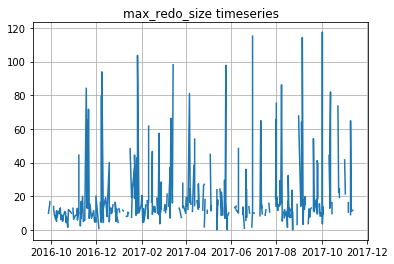

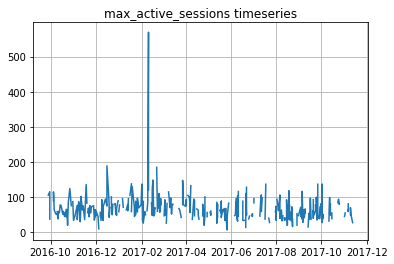

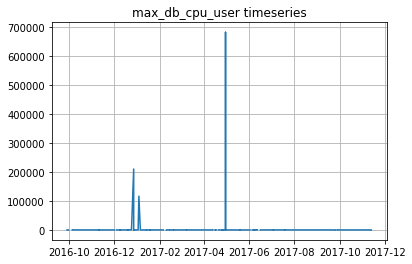

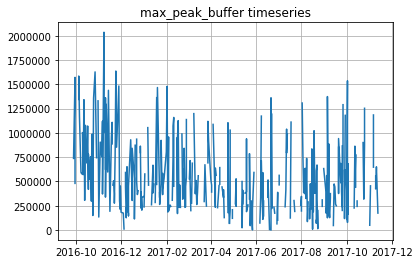

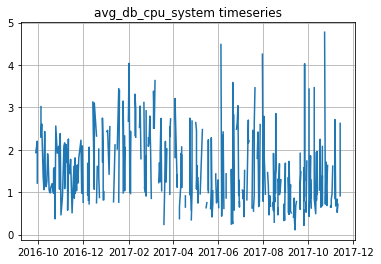

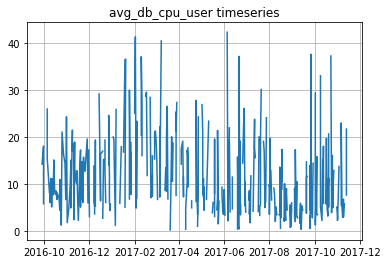

In [14]:
datacenter = "LON"
pod = 'cs86'
superpod = 'SP9'

#def plot_histograms(df, interested_pod="na30", metric_name = 'avg_app_cpu'):
mask = (df_cpu_transactions['datacenter'] == datacenter) & (df_cpu_transactions['pod'] == pod) &  (df_cpu_transactions['superpod'] == superpod)


metrics = ['max_redo_size', 'max_active_sessions', 'max_db_cpu_user', 'max_peak_buffer', 'avg_db_cpu_system', 
              'avg_db_cpu_user']
df_series = size_df.loc[mask]
df_time = df_series[['date_key']].astype(str)
time_stamp = [parser.parse(a) for a in df_time['date_key'].tolist()]
df_series['date'] = time_stamp
df_series = df_series.sort_values(by='date',ascending=True)

for m in metrics: 
    plt.close()
    plt.figure()
    plt.plot(df_series['date'], df_series[m])
    plt.grid(True)
    plt.title('{m} timeseries'.format(m = m))
    plt.show()    
    plt.close()
